In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sign
from resolucionecuaciones import *
from decimal import *

#Defino precision por defecto 

getcontext().prec=30


#funcion para pasar un numero a formato Decimal 

def todecimal(x):
    if isinstance(x, Decimal):
        return x
    else:
        return Decimal(str(x))

# tolerancia , precision e iteraciones por defecto 
tol =10**(-1)
prec=10**(-20)
nmax=100


**Ejercicio 1.** Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [ ]:



def f(x):
    return np.exp(x) -3
def secante(f, x0, x1, nmax=nmax, prec=prec, tol=tol):
    """
    Implementa el método de la secante para encontrar una raíz de la función f.

    Parámetros:
    -----------
    f : función
        La función cuya raíz se desea encontrar.
    x0 : float
        Primera aproximación inicial para la raíz.
    x1 : float
        Segunda aproximación inicial para la raíz.
    nmax : int
        Número máximo de iteraciones.
    prec : float
        Criterio de precisión; se detiene si |f(xn)| < prec.
    tol : float
        Criterio de tolerancia; se detiene si |x1 - xn1| < tol.

    """
    niter = 0
    cont = True
    exit = ''
    x0 = todecimal(x0)
    x1=todecimal(x1)
    while niter < nmax and cont:
        niter += 1
        xn1 = x1 - (((x1 - x0) / (todecimal(f(x1)) - (todecimal(f(x0))))) * f(x1))
        xn1 = todecimal(xn1)

        if abs(f(xn1)) < prec:
            exit = 'precision'
            cont = False
        
        if abs(x1 - xn1) < tol:
            exit = 'tolerancia'
            cont = False
        
        x0 = todecimal(x1)
        x1 = todecimal(xn1)

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn1}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn1}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn1, niter, exit
raiz ,iter ,salida =secante(f, x0=1.0, x1=2.0, nmax=1000, prec=1e-25, tol=1e-25)


Posiblemente solución exacta: 1.0986


**Ejercicio 2.** Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

In [26]:

def wittaker(f, x0, m, nmax=nmax, prec=prec, tol=tol):
    """
    Implementa el método de Whittaker para encontrar una raíz de la función f.

    Parámetros:
    -----------
    f : función
        La función cuya raíz se desea encontrar.
    x0 : float
        Aproximación inicial para la raíz.
    m : float
        Parámetro de pendiente usado en la iteración.
    nmax : int
        Número máximo de iteraciones.
    prec : float
        Criterio de precisión; se detiene si |f(xn)| < prec.
    tol : float
        Criterio de tolerancia; se detiene si |x0 - xn| < tol.
    """
    x0 = todecimal(x0)
    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (todecimal(f(x0)) / m)
        xn=todecimal(xn)
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit



raiz ,iter ,salida =wittaker(f,0.9,2,nmax=1000, prec=1e-25, tol=1e-25)


Posiblemente solución exacta: 1.0986


**Ejercicio 3.** Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:

Aproxima la raíz de la función $f(x)=e^x-3$:
* Cambiando la precisión a 5 cifras significativas.
* Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.

In [ ]:
def df(x):
    return np.exp(x)


def NewtonRaphson(f, df, x0, nmax=nmax, prec=prec, tol=tol):
    """
    Implementa el método de Newton-Raphson para encontrar una raíz de la función f.

    Parámetros:
    -----------
    f : función
        La función cuya raíz se desea encontrar.
    df : función
        La derivada de la función f.
    x0 : float
        Aproximación inicial para la raíz.
    nmax : int
        Número máximo de iteraciones.
    prec : float
        Criterio de precisión; se detiene si |f(xn)| < prec.
    tol : float
        Criterio de tolerancia; se detiene si |x0 - xn| < tol.

    Retorna:
    --------
    xn : float
        Raíz aproximada.
    niter : int
        Número de iteraciones realizadas.
    exit : str
        Condición de salida ('precision', 'tolerancia' o máximo de iteraciones alcanzado).
    """
    niter = 0
    cont = True
    exit = ''
    x0 = todecimal(x0)
    while niter < nmax and cont:
        niter += 1
        xn = x0 - (todecimal(f(x0)) / todecimal(df(x0)))
        xn = todecimal(xn)
        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        x0 = xn

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit

raiz ,iter ,salida =NewtonRaphson(f,df,1,nmax=1000, prec=1e-25, tol=1e-25)
   

Se llegó al número máximo de iteraciones 


**Ejercicio 4.** Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

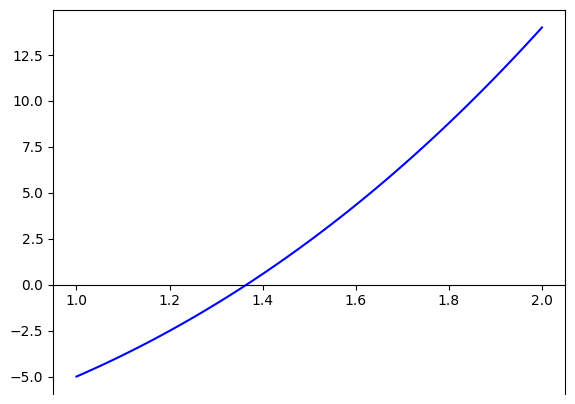

In [22]:
def f(x):
    return x**3 +4*x**2 -10


x=np.linspace(1,2,100)
y=f(x)
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.spines['bottom'].set_position('zero')
ax.plot(x,y,'b')


**Ejercicio 5.** Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

1. $3x=2+x^2-e^x$.

2. $x^2+10 \cos x+x=0$.

In [23]:
def f1(x):
   return 3*x -2 -x**2 -np.exp(x)
def f2(x):
   return x**2 + 10*np.cos(x) +x

NewtonRaphson(f1,1,100,1e-25,1e-25) 
NewtonRaphson(f2,1,100,1e-25,1e-25) 

TypeError: 'int' object is not callable

**Ejercicio 6.** Para la función  $ f(x)= 3 x^2+e^x-1$,

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [ ]:
def f3(x):
    return x**2 + np.exp(x)-1

biseccion(f,0,1,1000,1e-4,1e-4)
NewtonRaphson(f2,0,100,1e-25,1e-25) 

> **Ejercicio 7.** Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
> * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
> * Aproxima su única raíz utilizando el método de Steffensen:
>     * Cambiando la precisión a 5 cifras significativas.
>     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [ ]:

def Steffensen(f,x0, nmax=nmax, prec=prec, tol=tol):
    """
    Implementa el método de Steffensen para encontrar una raíz de la función f.

    Parámetros:
    -----------
    f : función
        La función cuya raíz se desea encontrar.
    x0 : float
        Aproximación inicial para la raíz.
    nmax : int
        Número máximo de iteraciones.
    prec : float   
        Criterio de precisión; se detiene si |f(xn)| < prec.
    tol : float
        Criterio de tolerancia; se detiene si |x0 - xn| < tol. 

    """
    niter = 0
    cont = True
    exit = ''
    x0 = todecimal(xo)
    while niter < nmax and cont:
        niter += 1
        xn = todecimal(x0 - ((todecimal(f(x0))**2) / (todecimal(f(x0+todecimal(f(x0))))-todecimal(f(x0)))))

        if abs(f(xn)) < prec:
            exit = 'precision'
            cont = False

        if abs(x0 - xn) < tol:
            exit = 'tolerancia'
            cont = False
        x0=xn
    if exit == 'precision':
        print(f'Posiblemente solución exacta: {xn}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {xn}')
    else:
        print(f'Se llegó al número máximo de iteraciones ')
    return xn, niter, exit


> **Ejercicio 8.** Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.


> **Ejercicio 9** Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
> 
> i) $f(x)=x^7-x^4+2$ ,
> 
> ii) $f(x)=x^7+\cos  x-3$.


> **Ejercicio 10:** De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
> $$
> f:[0,1]\longrightarrow\mathbb R \\
> f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
> $$
> que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.